# Battle of Neighbourhoods - week 2

This notebook consist of two parts.

#### 1 Introduction/Business Problem

    1.a Discussion of the business problem and the audience who would be interested in this project.

#### 2 Data Section

    2-a What data is used?
    2-b Importing Libraries
    2-c Credentials and Core location
    2-d Search for hotel within 1 KM
    2-e Location of Hotels (without the closest hotel to the red dot)

#### 3 methodology

just doing some data analysis to compare the hotels and the distances between them anc calculate the average distance between them

#### 4 Results Section

The final map with everything thing in the last map except it will offers you the closest hotel

#### 5 Discussion section

#### 6 Conclusion section

# 1. Introduction/Business Problem

### Discussion of the business problem and the audience who would be interested in this project.

#### Something about the tourist place-Mahamad walid

I am from Cairo,the capital of Egypt and I had an idea of travelling to sharm el sheikh, but I have never been there and I also don't know what hotel should I stay in, so I thought why do not I use the stuff that I learned from that course to make a map of sharm el sheikh that has all the hotels in it with almost all the details needed.

#### Expected / Interested Audience

sharm el sheikh is a well known city for being a nice place to stay in and have a nice holiday and lots of tourists go there as they find lots of fun stuff there and have a chance to go to its amazing beaches and its clear sea and do safaris, etc.

# 2.Data section

#### 2.a What data is used?

We will be completely working on Foursquare data to explore and try to locate our new hotel where more venues beach, memorials that are present nearby

#### How will we be solving using this data?

We will look for midpoint area of venues to locate our hotel.Before that our major focus will be on all venues present in and around the core place of sharm el sheikh.

Just a heads up on how many hotels are distributed now around sharm el sheikh.We will perform some EDA on hotels & restaurants present in the tourist spot.On furthur notebook we will use Foursquare data to determine other venues as well.

#### 2.b Importing Libraries

In [1]:
#install libraries
!pip install beautifulsoup4
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

import folium # map rendering library

print("*********   Loaded library completed   ***********")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.

*********   Loaded library completed   ***********


#### 2.c Credentials and Core location

In [2]:
CLIENT_ID = '23C50AA4MZYMOXVM5Q4ZMZNFI1MFXQHRRD0NLJAJU1MZU1YE' # your Foursquare ID
CLIENT_SECRET = 'FBR5LKO0XY34LSXEI4QMX5ZVHCUCFYHDEXIUP1ZJWO12PPZS ' # your Foursquare Secret
VERSION = '20191028'
LIMIT = 150

address = "sharm el sheikh, south sinai"

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude =location.latitude   #8.079252 # location.latitude 
longitude =location.longitude #77.5499338 # location.longitude # 

sharm='sharm el sheikh location : {},{}'.format(latitude,longitude)
print(sharm)

sharm el sheikh location : 27.8669082,34.3014551


#### 2.d Search for hotel within 1 KM

In [3]:
#Quering for hotel
searchquery = 'hotel'
radius = 1000
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                         CLIENT_SECRET,
                                                                                                                                         latitude,
                                                                                                                                         longitude,
                                                                                                                                         VERSION,
                                                                                                                                         searchquery, 
                                                                                                                                         radius,
                                                                                                                                         LIMIT)
#url

#### Send the GET Request of hotel and examine the results

In [4]:
results_hotel = requests.get(url_hotel).json()
#results_hotel

#### Get relevant part of JSON and transform it into a pandas dataframe

In [5]:
# assign relevant part of JSON to venues
venues_hotel = results_hotel['response']['venues']

dfhotel = json_normalize(venues_hotel)
print("There are {} hotels at sharm el sheikh".format(dfhotel.shape[0]))

There are 22 hotels at sharm el sheikh


#### Define information of interest and filter dataframe

In [6]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dfhotel.columns if col.startswith('location.')] + ['id']
dfhotel_filtered = dfhotel.loc[:, filtered_columns]

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

    
# filter the category for each row
dfhotel_filtered['categories'] = dfhotel_filtered.apply(get_category_type, axis=1)

  
# clean column names by keeping only last term
dfhotel_filtered.columns = [column.split('.')[-1] for column in dfhotel_filtered.columns]

#dataframe_filtered
hotels_df=dfhotel_filtered[['name','categories','distance','lat','lng','id']]
hotels_df

,name,categories,distance,lat,lng,id
0,Aida Hotel,Resort,232,27.865193,34.302795,4f7df6cae4b02c4144246ec1
1,Reception at Beach Albatros Hotel,Travel Lounge,839,27.859548,34.299601,52eb96a7498ead9f84d77ec8
2,Bar Club House at Beach Albatros Hotel,Beach Bar,914,27.858958,34.299093,52eeca4b11d2b781e6bcf21c
3,IL Mercato Hotel & Spa,Resort,704,27.863615,34.307564,4ee4dbf661aff5a34229d426
4,Renissance Hotel Spa,Spa,232,27.866892,34.303822,4ffc674ce4b07354de04550e
5,Pool at Aida Hotel,Pool,230,27.864835,34.301360,520d42d811d2869e9eec26fb
6,Sunset Hotel,Resort,367,27.868935,34.304397,501cf25ee4b0d7d7019198ca
7,Beach Albatros Hotel,Resort,971,27.858318,34.303172,51e985df498e898537573a53
8,Tropicana Tivoli Hotel Sharm el-Sheikh,Hotel,477,27.870076,34.304724,4bc87ddadc55eee13e7fe8ac
9,"rejency hotel,sharm alsheikh",Assisted Living,598,27.862221,34.304428,55d060de498efe2636ece494


#### 2.e Location of Hotels without the selecting the closest hotel to the red dot

In [7]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari
# add a red circle marker to represent the core location of sharm el sheikh
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='sharm el sheikh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)
#for loop to place the Latitude, Longitude, hotel name, hotel categories all together and draws a cricle marker in blue for hotels
for lat,lng,name,categories,distance in zip(hotels_df['lat'], hotels_df['lng'], hotels_df['name'], hotels_df['categories'],hotels_df['distance']):
    label = '{}, {}, {}m'.format(name, categories, distance)
    label = folium.Popup(label, parse_html=True)
    #makes a pop that tells you the hotel name and its categories
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)
# display map
hotels_map

## 3.Methodology section

In this sections we will perform some data analysis<br>
to know which is the closest hotel to our red point (which is center of sharm el sheikh) and also the average distance between hotels and core location

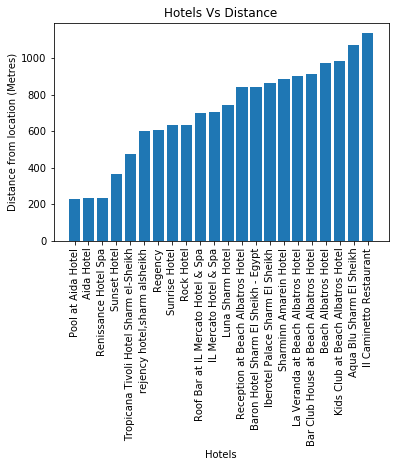

the number of the shortest distance index is 5
Average distance between hotels and core location is 707 metres


In [8]:
distance_hotel_df=dfhotel_filtered[['name','categories','distance','lat','lng']].sort_values('distance')
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(distance_hotel_df.name))
    plt.bar(distance_hotel_df.name, distance_hotel_df.distance)
    plt.xlabel('Hotels')
    plt.ylabel('Distance from location (Metres)')
    plt.xticks(distance_hotel_df.name,rotation=90)
    plt.title('Hotels Vs Distance')
    plt.show()
    
plot_bar_x()

close_dis = min(distance_hotel_df.distance)
ind_clo_num_not_int = distance_hotel_df[distance_hotel_df['distance']==close_dis].index.values
ind_clo_num = int(ind_clo_num_not_int)
print("the number of the shortest distance index is " + str(ind_clo_num))
print("Average distance between hotels and core location is {} metres".format(int(sum(hotels_df['distance'])/hotels_df.shape[0])))

## 4.Results Section

In [9]:
lat_ind = distance_hotel_df.lat[ind_clo_num]
lng_ind = distance_hotel_df.lng[ind_clo_num]
print(lat_ind)
print(lng_ind)

27.864835221577067
34.30136007465381


In [10]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Kanyakumari
# add a red circle marker to represent the core location of sharm el sheikh
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='sharm el sheikh',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(hotels_map)
#for loop to place the Latitude, Longitude, hotel name, hotel categories all together and draws a cricle marker in blue for hotels
for lat,lng,name,categories,distance in zip(hotels_df['lat'], hotels_df['lng'], hotels_df['name'], hotels_df['categories'],hotels_df['distance']):
    label = '{}, {}, {}m'.format(name, categories, distance)
    label = folium.Popup(label, parse_html=True)
    #makes a pop that tells you the hotel name and its categories
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(hotels_map)
label = 'the closest hotel is {},it is {}m away from you"'.format(distance_hotel_df.name[ind_clo_num], distance_hotel_df.distance[ind_clo_num])   
label = folium.Popup(label, parse_html=True)
#draws a green cricle marker on the closest hotel from your position
folium.features.CircleMarker(
    [lat_ind, lng_ind],
    radius=5,
    color='green',
    popup=label,
    fill = True,
    fill_color='green',
    fill_opacity=0.6
).add_to(hotels_map)
# display map
hotels_map

## 5. Discussion section

From this finall map we find that pool at aida hotel is the closest hotel from your spot and finally you cna stay for the night.
<br>Well that app would be super helpful if you were in a rush and didn't know anyplace to stay in for the night.
<br>I used so basic code but it helped to solve a problem that faced me in my life, so i am proud of myself.

## 6. Conclusion section

There are about 9,000 English tourists are in Sharm on any given day so for sure at least 500 of them would need to find<br> a hotel asap to stay in at night at least for one day so i think that app will be helpfull for them and there soem egyptians like who have never been there that will need that app for sure to find a place to stay in.<br>
Shortly this app gives a temper hotel to stay as it doesn't give you the ratings or any recommendations, it just tells where is the closest hotel.

# Thanks for taking a look on my project have a nice day!